# Figure 3B & S4A

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, solve, simplify
import pandas as pd
import sympy as sp
plt.rcParams.update({'font.size': 20})

# Definitions

Function to plot together results of different experiments

In [2]:
def plot_comp(x_ctrl65, x_ctrl66, x_ctrl67, x_ctrl68, x_inj65, x_inj66, x_inj67, x_inj68, n , a=0.2): 
    
    # Control 
    x = np.random.normal(1, 0.08, size=len(x_ctrl66))
    axs[n].plot(x,x_ctrl66,'.', color='tab:green', alpha=a, markersize=10, zorder=1)

    x = np.random.normal(1, 0.08, size=len(x_ctrl67))
    axs[n].plot(x,x_ctrl67,'.', color='tab:blue', alpha=a, markersize=10, zorder=1)

    x = np.random.normal(1, 0.08, size=len(x_ctrl68))
    axs[n].plot(x,x_ctrl68,'.', color='tab:grey', alpha=a, markersize=10, zorder=1)

    x = np.random.normal(1, 0.08, size=len(x_ctrl65))
    axs[n].plot(x,x_ctrl65,'.', color='orchid', alpha=a, markersize=10, zorder=1)


    # Inj 
    x = np.random.normal(2, 0.08, size=len(x_inj66))
    axs[n].plot(x,x_inj66,'.', color='tab:green', alpha=a, markersize=10, zorder=1)

    x = np.random.normal(2, 0.08, size=len(x_inj67))
    axs[n].plot(x,x_inj67,'.', color='tab:blue', alpha=a, markersize=10, zorder=1)

    x = np.random.normal(2, 0.08, size=len(x_inj68))
    axs[n].plot(x,x_inj68,'.', color='tab:grey', alpha=a, markersize=10, zorder=1)

    x = np.random.normal(2, 0.08, size=len(x_inj65))
    axs[n].plot(x,x_inj65,'.', color='orchid', alpha=a, markersize=10, zorder=1)



Function to define the properties of the axis of a plot

In [3]:
def my_axsis(ax, xlim, ylim, xticks, title, xtickslabels, bold=True, scale='lin'):    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(xticks)
    ax.set_title(title)
    ax.set_xticklabels(xtickslabels)
    
    if bold==True:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.2)
            
    if scale=='log':
        ax.set_yscale('log', base=2)

Function to define the properties of the errorbar

In [4]:
def myErrorbar(x, mean_a65, mean_a66, mean_a67, mean_a68, std_a65, std_a66, std_a67, std_a68, axs): 
    axs.errorbar(x, mean_a65, std_a65, label='Exp data (mean \u00B1 std)', marker='o',markersize=5,color='mediumorchid', capsize=5,mfc='mediumorchid', mec='mediumorchid', ls='none', zorder=2)
    axs.errorbar(x, mean_a66, std_a66, label='Exp data (mean \u00B1 std)', marker='o',markersize=5,color='tab:green', capsize=5,mfc='tab:green', mec='tab:green', ls='none', zorder=2)
    axs.errorbar(x, mean_a67, std_a67, label='Exp data (mean \u00B1 std)', marker='o',markersize=5,color='tab:blue', capsize=5,mfc='tab:blue', mec='tab:blue', ls='none', zorder=2)
    axs.errorbar(x, mean_a68, std_a68, label='Exp data (mean \u00B1 std)', marker='o',markersize=5,color='grey', capsize=5,mfc='grey', mec='grey', ls='none', zorder=2)

# Model 

Definition of the parameters of the model

In [5]:
T, V1, V2, K1, K2, Kb = symbols('T V1 V2 K1 K2 Kb') 
Vs, Rb, Ks, Vrg, Qb, Krg = symbols('Vs Rb Ks Vrg Qb Krg')
R, F, Kd, Q, E, Ke = symbols('R F Kd Q E Ke')
S1, Qtot, S2, Rtot= symbols('S1 Qtot S2 Rtot')
Ap,kMM3,Er,KMM3,vMM4,KMM4 = symbols('Ap kMM3 Er KMM3 vMM4 KMM4')
I, kMM1, Er, KMM1, vMM2,KMM2 = symbols('I kMM1 Er KMM1 vMM2 KMM2')
vb, vo, Ap, Ka, Ki, I, k, O = symbols('vb vo Ap Ka Ki I k O')

Evolution equation for T 

In [6]:
# Evolution equation for T: 
expr = V1*(1-T)/(K1+(1-T))-V2*T/(K2+T)-Kb*T
expr_simplified= V1*(1-T)*(K2+T) -V2*T*(K1+(1-T))-Kb*T*(K1+(1-T))*(K2+T)
print('Evolution equation for T:')
print(expr)

# Substitute the expression for V1 and V2 in the evolution equation for T:  
expr_RQ= expr_simplified.subs([(V1, Vs*(R*F/(Kd+F))/(Ks+(R*F/(Kd+F)))),(V2, Vrg*(Q*E/(Ke+E))/(Krg+(Q*E/(Ke+E))))])

# Substitute the expressions for Q and R
expr_S1S2 = expr_RQ.subs([(R, Rtot*S1),(Q, Qtot*S2)])

# Expliciting the relation between S1 and S2 to obtain T(FGF, S1): 
expr_T = expr_S1S2.subs([(S2,-1.1265*S1 +0.9092)])

# Solve the equation 
sol = solve(expr_T, T)[2]

Evolution equation for T:
-Kb*T - T*V2/(K2 + T) + V1*(1 - T)/(K1 - T + 1)


Definition of the function ExprT that compute T as a function of all the parameters of the equation

In [7]:
def exprT(Vs_v=1, Vrg_v=0.4, K1_v=0.5, K2_v=0.2, Krg_v=1200, Ks_v=1200, Kb_v=0.2, F_v=5, Kd_v=25, E_v=5, Ke_v=50, Rtot_v=2000, Qtot_v=2000, S1_v=0.5):
    sol_T = sol.subs([(Vs,Vs_v),(Vrg,Vrg_v),(K1, K1_v),(K2,K2_v),(Krg, Krg_v), (Ks, Ks_v), (Kb, Kb_v),(F, F_v),(Kd, Kd_v),(E,E_v), (Ke, Ke_v),(Rtot, Rtot_v),(Qtot,Qtot_v),(S1,S1_v)])
    sol_T = np.real(np.array(sol_T,complex))
    return sol_T

Definition of the function to compute Erk (as a function of T)

In [8]:
def Erk(T,n=2, Kerk=0.5, Erk_max=1, Erk_bas=0): 
    Erk = [ Erk_max* T[i]**n/(T[i]**n +Kerk**n)+Erk_bas for i in range(len(T)) ]
    return Erk

Evolution equation for the activator Ap

In [9]:
expr_Ap = kMM3*Er*(1-Ap)/(KMM3+(1-Ap))-vMM4*Ap/(KMM4+Ap)
sol_Ap= solve(expr_Ap, Ap)[1] 

# Function to compute Ap as a function of the other parameters:  
def exprAp(kMM3_v=12,Er_v=0.5,KMM3_v=0.05,vMM4_v=1,KMM4_v=0.05):
    solAp= sol_Ap.subs([(kMM3,kMM3_v), (Er,Er_v), (KMM4,KMM4_v), (vMM4,vMM4_v), (KMM3,KMM3_v)]) 
    return solAp

Evolution equation for the inhibitor I

In [10]:
expr_I = -kMM1*Er*I/(KMM1+I)+vMM2*(1-I)/(KMM2+(1-I))
sol_I= solve(expr_I, I)[0] 

# Function to compute I as a function of the other parameters: 
def exprI(kMM1_v=12,Er_v=0.5,KMM1_v=0.05,vMM2_v=1,KMM2_v=0.05): 
    solI= sol_I.subs([(kMM1,kMM1_v), (Er,Er_v), (KMM1,KMM1_v), (vMM2,vMM2_v), (KMM2,KMM2_v)]) 
    return solI 

Compute Otx and define a function ExprOtx that compute Otx as a function of all the parameters of the equation

In [11]:
expr_Otx = vb+ vo*Ap/((Ka*(1+I/Ki))+Ap)-k*O
sol_Otx= solve(expr_Otx, O)[0]  

# Function to compute Otx as a function of the other parameters
def exprOtx(Ap_v, I_v, vb_v=0.001,vo_v=1,Ka_v=0.1,Ki_v=0.1,k_v=0.2, Omax=1, Obas=0): 
    solOtx= [sol_Otx.subs([(Ap, Ap_v[i]), (I, I_v[i]), (vb,vb_v), (vo,vo_v), (Ka,Ka_v), (Ki,Ki_v), (k,k_v)])*Omax +Obas for i in range(len(Ap_v))] 
    return solOtx

# Import the experimental data

In [12]:
#read the excel file with the experimental data
data_S1 = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Cell surface contacts')
df_S1 = pd.DataFrame(data_S1)

data_Fig3B = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Fig 3B & S4A')
df_Fig3B = pd.DataFrame(data_Fig3B)

Experimental data figure 1C

In [13]:
# Reltive area of cell surface contact with FGF expressing cells (divided by cell type)
a65_RelContactArea_A = np.array(df_S1['a6.5 S1'].values.tolist())[0:25] 
a66_RelContactArea_A = np.array(df_S1['a6.6 S1'].values.tolist())[0:25] 
a67_RelContactArea_A = np.array(df_S1['a6.7 S1'].values.tolist())[0:25] 
a68_RelContactArea_A = np.array(df_S1['a6.8 S1'].values.tolist())[0:25] 

Experimental data figure 3B

In [14]:
# Level of Otx expression obtained in the different experiments

# Control
control_PHGFP = np.array(df_Fig3B['ctrlPH'].values.tolist())
inj_PHGFP = np.array(df_Fig3B['injPH'].values.tolist())

# dnFGFR
control_dnFGFR = np.array(df_Fig3B['ctrldnFGFR'].values.tolist())
inj_dnFGFR = np.array(df_Fig3B['injdnFGFR'].values.tolist())

# dnRG
control_dnRG = np.array(df_Fig3B['ctrlRGDGAP'].values.tolist())
inj_dnRG = np.array(df_Fig3B['injRGDGAP'].values.tolist())

# dnEph
control_dnEph = np.array(df_Fig3B['ctrlEph3DC'].values.tolist())
inj_dnEph = np.array(df_Fig3B['injEph3DC'].values.tolist())

In [15]:
# Divide the data by cell type
control_PHGFP_a65 = control_PHGFP[0:25]
control_PHGFP_a66 = control_PHGFP[26:50]
control_PHGFP_a67 = control_PHGFP[51:75]
control_PHGFP_a68 = control_PHGFP[77:101]

inj_PHGFP_a65 = inj_PHGFP[0:25]
inj_PHGFP_a66 = inj_PHGFP[26:50]
inj_PHGFP_a67 = inj_PHGFP[51:75]
inj_PHGFP_a68 = inj_PHGFP[77:101]


control_dnFGFR_a65 = control_dnFGFR[0:18]
control_dnFGFR_a66 = control_dnFGFR[20:37]
control_dnFGFR_a67 = control_dnFGFR[38:56]
control_dnFGFR_a68 = control_dnFGFR[58:75]

inj_dnFGFR_a65 = inj_dnFGFR[0:18]
inj_dnFGFR_a66 = inj_dnFGFR[20:37]
inj_dnFGFR_a67 = inj_dnFGFR[38:56]
inj_dnFGFR_a68 = inj_dnFGFR[58:75]


control_dnRG_a65 = control_dnRG[0:19]
control_dnRG_a66 = control_dnRG[20:39]
control_dnRG_a67 = control_dnRG[40:59]
control_dnRG_a68 = control_dnRG[60:79]

inj_dnRG_a65 = inj_dnRG[0:19]
inj_dnRG_a66 = inj_dnRG[20:39]
inj_dnRG_a67 = inj_dnRG[40:59]
inj_dnRG_a68 = inj_dnRG[60:79]


control_dnEph_a65 = control_dnEph[0:46]
control_dnEph_a66 = control_dnEph[47:93]
control_dnEph_a67 = control_dnEph[94:140]
control_dnEph_a68 = control_dnEph[141:187]

inj_dnEph_a65 = inj_dnEph[0:46]
inj_dnEph_a66 = inj_dnEph[47:93]
inj_dnEph_a67 = inj_dnEph[94:140]
inj_dnEph_a68 = inj_dnEph[141:187]

In [16]:
# Compute mean and std of exp data 
mean_inj_PHGFP_a65 = np.mean(inj_PHGFP_a65)
mean_inj_PHGFP_a66 = np.mean(inj_PHGFP_a66)
mean_inj_PHGFP_a67 = np.mean(inj_PHGFP_a67)
mean_inj_PHGFP_a68 = np.mean(inj_PHGFP_a68)

std_inj_PHGFP_a65 = np.std(inj_PHGFP_a65)
std_inj_PHGFP_a66 = np.std(inj_PHGFP_a66)
std_inj_PHGFP_a67 = np.std(inj_PHGFP_a67)
std_inj_PHGFP_a68 = np.std(inj_PHGFP_a68)

mean_inj_dnFGFR_a65 = np.mean(inj_dnFGFR_a65)
mean_inj_dnFGFR_a66 = np.mean(inj_dnFGFR_a66)
mean_inj_dnFGFR_a67 = np.mean(inj_dnFGFR_a67)
mean_inj_dnFGFR_a68 = np.mean(inj_dnFGFR_a68)

std_inj_dnFGFR_a65 = np.std(inj_dnFGFR_a65)
std_inj_dnFGFR_a66 = np.std(inj_dnFGFR_a66)
std_inj_dnFGFR_a67 = np.std(inj_dnFGFR_a67)
std_inj_dnFGFR_a68 = np.std(inj_dnFGFR_a68)

mean_inj_dnEph_a65 = np.mean(inj_dnEph_a65)
mean_inj_dnEph_a66 = np.mean(inj_dnEph_a66)
mean_inj_dnEph_a67 = np.mean(inj_dnEph_a67)
mean_inj_dnEph_a68 = np.mean(inj_dnEph_a68)

std_inj_dnEph_a65 = np.std(inj_dnEph_a65)
std_inj_dnEph_a66 = np.std(inj_dnEph_a66)
std_inj_dnEph_a67 = np.std(inj_dnEph_a67)
std_inj_dnEph_a68 = np.std(inj_dnEph_a68)

mean_inj_dnRG_a65 = np.mean(inj_dnRG_a65)
mean_inj_dnRG_a66 = np.mean(inj_dnRG_a66)
mean_inj_dnRG_a67 = np.mean(inj_dnRG_a67)
mean_inj_dnRG_a68 = np.mean(inj_dnRG_a68)

std_inj_dnRG_a65 = np.std(inj_dnRG_a65)
std_inj_dnRG_a66 = np.std(inj_dnRG_a66)
std_inj_dnRG_a67 = np.std(inj_dnRG_a67)
std_inj_dnRG_a68 = np.std(inj_dnRG_a68)

# Results

## Figure 3B

### Model predictions

#### Control

In [17]:
# Compute T
T_pred_65 = [exprT(S1_v= a65_RelContactArea_A[i]) for i in range(len(a65_RelContactArea_A))]
T_pred_66 = [exprT(S1_v= a66_RelContactArea_A[i]) for i in range(len(a66_RelContactArea_A))]
T_pred_67 = [exprT(S1_v= a67_RelContactArea_A[i]) for i in range(len(a67_RelContactArea_A))]
T_pred_68 = [exprT(S1_v= a68_RelContactArea_A[i]) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity
Erk_pred_65 = Erk(T_pred_65)
Erk_pred_66 = Erk(T_pred_66)
Erk_pred_67 = Erk(T_pred_67)
Erk_pred_68 = Erk(T_pred_68)

# Compute Ap
Ap_pred_65 = [exprAp(Er_v=Erk_pred_65[i]) for i in range(len(Erk_pred_65))]
Ap_pred_66 = [exprAp(Er_v=Erk_pred_66[i]) for i in range(len(Erk_pred_66))]
Ap_pred_67 = [exprAp(Er_v=Erk_pred_67[i]) for i in range(len(Erk_pred_67))]
Ap_pred_68 = [exprAp(Er_v=Erk_pred_68[i]) for i in range(len(Erk_pred_68))]

# Compute I 
I_pred_65 = [exprI(Er_v=Erk_pred_65[i]) for i in range(len(Erk_pred_65))]
I_pred_66 = [exprI(Er_v=Erk_pred_66[i]) for i in range(len(Erk_pred_66))]
I_pred_67 = [exprI(Er_v=Erk_pred_67[i]) for i in range(len(Erk_pred_67))]
I_pred_68 = [exprI(Er_v=Erk_pred_68[i]) for i in range(len(Erk_pred_68))]

# Compute Otx expression 
Otx_pred_65_e = np.array(exprOtx(Ap_v=Ap_pred_65,I_v=I_pred_65)).astype(float)
Otx_pred_66_e = np.array(exprOtx(Ap_v=Ap_pred_66,I_v=I_pred_66)).astype(float)
Otx_pred_67_e = np.array(exprOtx(Ap_v=Ap_pred_67,I_v=I_pred_67)).astype(float)
Otx_pred_68_e = np.array(exprOtx(Ap_v=Ap_pred_68,I_v=I_pred_68)).astype(float)

# Compute mean
a65_Otx_mean_pred_e = np.mean(Otx_pred_65_e)
a66_Otx_mean_pred_e = np.mean(Otx_pred_66_e)
a67_Otx_mean_pred_e = np.mean(Otx_pred_67_e)
a68_Otx_mean_pred_e = np.mean(Otx_pred_68_e)

# Compute std
a65_Otx_std_pred_e = np.std(Otx_pred_65_e)
a66_Otx_std_pred_e = np.std(Otx_pred_66_e)
a67_Otx_std_pred_e = np.std(Otx_pred_67_e)
a68_Otx_std_pred_e = np.std(Otx_pred_68_e)

In [18]:
# Compute Otx smFISH spot counts 
Omax_value= 92
Obas_value = 1.5

Otx_pred_65_sc = np.array(exprOtx(Ap_v=Ap_pred_65,I_v=I_pred_65, Omax= Omax_value,Obas= Obas_value)).astype(float)
Otx_pred_66_sc = np.array(exprOtx(Ap_v=Ap_pred_66,I_v=I_pred_66, Omax= Omax_value,Obas= Obas_value)).astype(float)
Otx_pred_67_sc = np.array(exprOtx(Ap_v=Ap_pred_67,I_v=I_pred_67, Omax= Omax_value,Obas= Obas_value)).astype(float)
Otx_pred_68_sc = np.array(exprOtx(Ap_v=Ap_pred_68,I_v=I_pred_68, Omax= Omax_value,Obas= Obas_value)).astype(float)

# Compute mean
a65_Otx_mean_pred_sc = np.mean(Otx_pred_65_sc)
a66_Otx_mean_pred_sc = np.mean(Otx_pred_66_sc)
a67_Otx_mean_pred_sc = np.mean(Otx_pred_67_sc)
a68_Otx_mean_pred_sc = np.mean(Otx_pred_68_sc)

# Compute std
a65_Otx_std_pred_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_e**2+std_inj_PHGFP_a68**2)
a66_Otx_std_pred_sc = np.sqrt(Omax_value**2*a66_Otx_std_pred_e**2+std_inj_PHGFP_a68**2)
a67_Otx_std_pred_sc = np.sqrt(Omax_value**2*a67_Otx_std_pred_e**2+std_inj_PHGFP_a68**2)
a68_Otx_std_pred_sc = np.sqrt(Omax_value**2*a68_Otx_std_pred_e**2+std_inj_PHGFP_a68**2)

#### dnFGFR

In [19]:
# Compute T
T_pred_dnFGFR_65 = [exprT(S1_v= a65_RelContactArea_A[i], Rtot_v= 100) for i in range(len(a65_RelContactArea_A))]
T_pred_dnFGFR_66 = [exprT(S1_v= a66_RelContactArea_A[i], Rtot_v= 100) for i in range(len(a66_RelContactArea_A))]
T_pred_dnFGFR_67 = [exprT(S1_v= a67_RelContactArea_A[i], Rtot_v= 100) for i in range(len(a67_RelContactArea_A))]
T_pred_dnFGFR_68 = [exprT(S1_v= a68_RelContactArea_A[i], Rtot_v= 100) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity 
Erk_pred_dnFGFR_65 = Erk(T_pred_dnFGFR_65)
Erk_pred_dnFGFR_66 = Erk(T_pred_dnFGFR_66)
Erk_pred_dnFGFR_67 = Erk(T_pred_dnFGFR_67)
Erk_pred_dnFGFR_68 = Erk(T_pred_dnFGFR_68)

# Compute Ap
Ap_pred_dnFGFR_65 = [exprAp(Er_v=Erk_pred_dnFGFR_65[i]) for i in range(len(Erk_pred_dnFGFR_65))]
Ap_pred_dnFGFR_66 = [exprAp(Er_v=Erk_pred_dnFGFR_66[i]) for i in range(len(Erk_pred_dnFGFR_66))]
Ap_pred_dnFGFR_67 = [exprAp(Er_v=Erk_pred_dnFGFR_67[i]) for i in range(len(Erk_pred_dnFGFR_67))]
Ap_pred_dnFGFR_68 = [exprAp(Er_v=Erk_pred_dnFGFR_68[i]) for i in range(len(Erk_pred_dnFGFR_68))]

# Compute I 
I_pred_dnFGFR_65 = [exprI(Er_v=Erk_pred_dnFGFR_65[i]) for i in range(len(Erk_pred_dnFGFR_65))]
I_pred_dnFGFR_66 = [exprI(Er_v=Erk_pred_dnFGFR_66[i]) for i in range(len(Erk_pred_dnFGFR_66))]
I_pred_dnFGFR_67 = [exprI(Er_v=Erk_pred_dnFGFR_67[i]) for i in range(len(Erk_pred_dnFGFR_67))]
I_pred_dnFGFR_68 = [exprI(Er_v=Erk_pred_dnFGFR_68[i]) for i in range(len(Erk_pred_dnFGFR_68))]

# Compute Otx expression
Otx_pred_dnFGFR_65_e = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_65,I_v=I_pred_dnFGFR_65)).astype(float)
Otx_pred_dnFGFR_66_e = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_66,I_v=I_pred_dnFGFR_66)).astype(float)
Otx_pred_dnFGFR_67_e = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_67,I_v=I_pred_dnFGFR_67)).astype(float)
Otx_pred_dnFGFR_68_e = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_68,I_v=I_pred_dnFGFR_68)).astype(float)

# Compute mean
a65_Otx_mean_pred_dnFGFR_e = np.mean(Otx_pred_dnFGFR_65_e)
a66_Otx_mean_pred_dnFGFR_e = np.mean(Otx_pred_dnFGFR_66_e)
a67_Otx_mean_pred_dnFGFR_e = np.mean(Otx_pred_dnFGFR_67_e)
a68_Otx_mean_pred_dnFGFR_e = np.mean(Otx_pred_dnFGFR_68_e)

# Compute std
a65_Otx_std_pred_dnFGFR_e = np.std(Otx_pred_dnFGFR_65_e)
a66_Otx_std_pred_dnFGFR_e = np.std(Otx_pred_dnFGFR_66_e)
a67_Otx_std_pred_dnFGFR_e = np.std(Otx_pred_dnFGFR_67_e)
a68_Otx_std_pred_dnFGFR_e = np.std(Otx_pred_dnFGFR_68_e)

In [20]:
# Compute Otx spot counts
Omax_value= 92
Obas_value = 1.5

Ap_pred_dnFGFR_65 = [exprAp(Er_v=Erk_pred_dnFGFR_65[i]) for i in range(len(Erk_pred_dnFGFR_65))]
Ap_pred_dnFGFR_66 = [exprAp(Er_v=Erk_pred_dnFGFR_66[i]) for i in range(len(Erk_pred_dnFGFR_66))]
Ap_pred_dnFGFR_67 = [exprAp(Er_v=Erk_pred_dnFGFR_67[i]) for i in range(len(Erk_pred_dnFGFR_67))]
Ap_pred_dnFGFR_68 = [exprAp(Er_v=Erk_pred_dnFGFR_68[i]) for i in range(len(Erk_pred_dnFGFR_68))]

I_pred_dnFGFR_65 = [exprI(Er_v=Erk_pred_dnFGFR_65[i]) for i in range(len(Erk_pred_dnFGFR_65))]
I_pred_dnFGFR_66 = [exprI(Er_v=Erk_pred_dnFGFR_66[i]) for i in range(len(Erk_pred_dnFGFR_66))]
I_pred_dnFGFR_67 = [exprI(Er_v=Erk_pred_dnFGFR_67[i]) for i in range(len(Erk_pred_dnFGFR_67))]
I_pred_dnFGFR_68 = [exprI(Er_v=Erk_pred_dnFGFR_68[i]) for i in range(len(Erk_pred_dnFGFR_68))]

Otx_pred_dnFGFR_65_sc = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_65,I_v=I_pred_dnFGFR_65, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnFGFR_66_sc = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_66,I_v=I_pred_dnFGFR_66, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnFGFR_67_sc = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_67,I_v=I_pred_dnFGFR_67, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnFGFR_68_sc = np.array(exprOtx(Ap_v=Ap_pred_dnFGFR_68,I_v=I_pred_dnFGFR_68, Omax= Omax_value,Obas=Obas_value)).astype(float)

# Compute mean
a65_Otx_mean_pred_dnFGFR_sc = np.mean(Otx_pred_dnFGFR_65_sc)
a66_Otx_mean_pred_dnFGFR_sc = np.mean(Otx_pred_dnFGFR_66_sc)
a67_Otx_mean_pred_dnFGFR_sc = np.mean(Otx_pred_dnFGFR_67_sc)
a68_Otx_mean_pred_dnFGFR_sc = np.mean(Otx_pred_dnFGFR_68_sc)

# Compute std
a65_Otx_std_pred_dnFGFR_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnFGFR_e**2+std_inj_dnFGFR_a68**2)
a66_Otx_std_pred_dnFGFR_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnFGFR_e**2+std_inj_dnFGFR_a68**2)
a67_Otx_std_pred_dnFGFR_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnFGFR_e**2+std_inj_dnFGFR_a68**2)
a68_Otx_std_pred_dnFGFR_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnFGFR_e**2+std_inj_dnFGFR_a68**2)

#### Eph3$\Delta$C

In [21]:
# Compute T
T_pred_dnEph_65 = [exprT(S1_v= a65_RelContactArea_A[i], Qtot_v= 10) for i in range(len(a65_RelContactArea_A))]
T_pred_dnEph_66 = [exprT(S1_v= a66_RelContactArea_A[i], Qtot_v= 10) for i in range(len(a66_RelContactArea_A))]
T_pred_dnEph_67 = [exprT(S1_v= a67_RelContactArea_A[i], Qtot_v= 10) for i in range(len(a67_RelContactArea_A))]
T_pred_dnEph_68 = [exprT(S1_v= a68_RelContactArea_A[i], Qtot_v= 10) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity 
Erk_pred_dnEph_65 = Erk(T_pred_dnEph_65)
Erk_pred_dnEph_66 = Erk(T_pred_dnEph_66)
Erk_pred_dnEph_67 = Erk(T_pred_dnEph_67)
Erk_pred_dnEph_68 = Erk(T_pred_dnEph_68)

# Compute Ap
Ap_pred_dnEph_65 = [exprAp(Er_v=Erk_pred_dnEph_65[i]) for i in range(len(Erk_pred_dnEph_65))]
Ap_pred_dnEph_66 = [exprAp(Er_v=Erk_pred_dnEph_66[i]) for i in range(len(Erk_pred_dnEph_66))]
Ap_pred_dnEph_67 = [exprAp(Er_v=Erk_pred_dnEph_67[i]) for i in range(len(Erk_pred_dnEph_67))]
Ap_pred_dnEph_68 = [exprAp(Er_v=Erk_pred_dnEph_68[i]) for i in range(len(Erk_pred_dnEph_68))]

# Compute I 
I_pred_dnEph_65 = [exprI(Er_v=Erk_pred_dnEph_65[i]) for i in range(len(Erk_pred_dnEph_65))]
I_pred_dnEph_66 = [exprI(Er_v=Erk_pred_dnEph_66[i]) for i in range(len(Erk_pred_dnEph_66))]
I_pred_dnEph_67 = [exprI(Er_v=Erk_pred_dnEph_67[i]) for i in range(len(Erk_pred_dnEph_67))]
I_pred_dnEph_68 = [exprI(Er_v=Erk_pred_dnEph_68[i]) for i in range(len(Erk_pred_dnEph_68))]

# Compute Otx expression
Otx_pred_dnEph_65_e = np.array(exprOtx(Ap_v=Ap_pred_dnEph_65,I_v=I_pred_dnEph_65)).astype(float)
Otx_pred_dnEph_66_e = np.array(exprOtx(Ap_v=Ap_pred_dnEph_66,I_v=I_pred_dnEph_66)).astype(float)
Otx_pred_dnEph_67_e = np.array(exprOtx(Ap_v=Ap_pred_dnEph_67,I_v=I_pred_dnEph_67)).astype(float)
Otx_pred_dnEph_68_e = np.array(exprOtx(Ap_v=Ap_pred_dnEph_68,I_v=I_pred_dnEph_68)).astype(float)

# Compute mean
a65_Otx_mean_pred_dnEph_e = np.mean(Otx_pred_dnEph_65_e)
a66_Otx_mean_pred_dnEph_e = np.mean(Otx_pred_dnEph_66_e)
a67_Otx_mean_pred_dnEph_e = np.mean(Otx_pred_dnEph_67_e)
a68_Otx_mean_pred_dnEph_e = np.mean(Otx_pred_dnEph_68_e)

# Compute std
a65_Otx_std_pred_dnEph_e = np.std(Otx_pred_dnEph_65_e)
a66_Otx_std_pred_dnEph_e = np.std(Otx_pred_dnEph_66_e)
a67_Otx_std_pred_dnEph_e = np.std(Otx_pred_dnEph_67_e)
a68_Otx_std_pred_dnEph_e = np.std(Otx_pred_dnEph_68_e)

In [22]:
# Compute Otx spot counts
Omax_value= 95
Obas_value = mean_inj_dnEph_a68

Otx_pred_dnEph_65_sc = np.array(exprOtx(Ap_v=Ap_pred_dnEph_65,I_v=I_pred_dnEph_65, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnEph_66_sc = np.array(exprOtx(Ap_v=Ap_pred_dnEph_66,I_v=I_pred_dnEph_66, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnEph_67_sc = np.array(exprOtx(Ap_v=Ap_pred_dnEph_67,I_v=I_pred_dnEph_67, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnEph_68_sc = np.array(exprOtx(Ap_v=Ap_pred_dnEph_68,I_v=I_pred_dnEph_68, Omax= Omax_value,Obas=Obas_value)).astype(float)

# Compute mean
a65_Otx_mean_pred_dnEph_sc = np.mean(Otx_pred_dnEph_65_sc)
a66_Otx_mean_pred_dnEph_sc = np.mean(Otx_pred_dnEph_66_sc)
a67_Otx_mean_pred_dnEph_sc = np.mean(Otx_pred_dnEph_67_sc)
a68_Otx_mean_pred_dnEph_sc = np.mean(Otx_pred_dnEph_68_sc)

# Compute std
a65_Otx_std_pred_dnEph_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnEph_e**2+std_inj_dnEph_a68**2)
a66_Otx_std_pred_dnEph_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnEph_e**2+std_inj_dnEph_a68**2)
a67_Otx_std_pred_dnEph_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnEph_e**2+std_inj_dnEph_a68**2)
a68_Otx_std_pred_dnEph_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnEph_e**2+std_inj_dnEph_a68**2)

#### RG$\Delta$GAP

In [23]:
# Compute T 
T_pred_dnRG_65 = [exprT(S1_v= a65_RelContactArea_A[i], Vrg_v= 0.01) for i in range(len(a65_RelContactArea_A))]
T_pred_dnRG_66 = [exprT(S1_v= a66_RelContactArea_A[i], Vrg_v= 0.01) for i in range(len(a66_RelContactArea_A))]
T_pred_dnRG_67 = [exprT(S1_v= a67_RelContactArea_A[i], Vrg_v= 0.01) for i in range(len(a67_RelContactArea_A))]
T_pred_dnRG_68 = [exprT(S1_v= a68_RelContactArea_A[i], Vrg_v= 0.01) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity 
Erk_pred_dnRG_65 = Erk(T_pred_dnRG_65)
Erk_pred_dnRG_66 = Erk(T_pred_dnRG_66)
Erk_pred_dnRG_67 = Erk(T_pred_dnRG_67)
Erk_pred_dnRG_68 = Erk(T_pred_dnRG_68)

# Compute Ap
Ap_pred_dnRG_65 = [exprAp(Er_v=Erk_pred_dnRG_65[i]) for i in range(len(Erk_pred_dnRG_65))]
Ap_pred_dnRG_66 = [exprAp(Er_v=Erk_pred_dnRG_66[i]) for i in range(len(Erk_pred_dnRG_66))]
Ap_pred_dnRG_67 = [exprAp(Er_v=Erk_pred_dnRG_67[i]) for i in range(len(Erk_pred_dnRG_67))]
Ap_pred_dnRG_68 = [exprAp(Er_v=Erk_pred_dnRG_68[i]) for i in range(len(Erk_pred_dnRG_68))]

# Compute I 
I_pred_dnRG_65 = [exprI(Er_v=Erk_pred_dnRG_65[i]) for i in range(len(Erk_pred_dnRG_65))]
I_pred_dnRG_66 = [exprI(Er_v=Erk_pred_dnRG_66[i]) for i in range(len(Erk_pred_dnRG_66))]
I_pred_dnRG_67 = [exprI(Er_v=Erk_pred_dnRG_67[i]) for i in range(len(Erk_pred_dnRG_67))]
I_pred_dnRG_68 = [exprI(Er_v=Erk_pred_dnRG_68[i]) for i in range(len(Erk_pred_dnRG_68))]

# Compute Otx expression
Otx_pred_dnRG_65_e = np.array(exprOtx(Ap_v=Ap_pred_dnRG_65,I_v=I_pred_dnRG_65)).astype(float)
Otx_pred_dnRG_66_e = np.array(exprOtx(Ap_v=Ap_pred_dnRG_66,I_v=I_pred_dnRG_66)).astype(float)
Otx_pred_dnRG_67_e = np.array(exprOtx(Ap_v=Ap_pred_dnRG_67,I_v=I_pred_dnRG_67)).astype(float)
Otx_pred_dnRG_68_e = np.array(exprOtx(Ap_v=Ap_pred_dnRG_68,I_v=I_pred_dnRG_68)).astype(float)

# Compute mean
a65_Otx_mean_pred_dnRG_e = np.mean(Otx_pred_dnRG_65_e)
a66_Otx_mean_pred_dnRG_e = np.mean(Otx_pred_dnRG_66_e)
a67_Otx_mean_pred_dnRG_e = np.mean(Otx_pred_dnRG_67_e)
a68_Otx_mean_pred_dnRG_e = np.mean(Otx_pred_dnRG_68_e)

# Compute std
a65_Otx_std_pred_dnRG_e = np.std(Otx_pred_dnRG_65_e)
a66_Otx_std_pred_dnRG_e = np.std(Otx_pred_dnRG_66_e)
a67_Otx_std_pred_dnRG_e = np.std(Otx_pred_dnRG_67_e)
a68_Otx_std_pred_dnRG_e = np.std(Otx_pred_dnRG_68_e)

In [24]:
Omax_value= 122 
Obas_value = mean_inj_dnRG_a68

# Compute Otx smFISH spot counts
Otx_pred_dnRG_65_sc = np.array(exprOtx(Ap_v=Ap_pred_dnRG_65,I_v=I_pred_dnRG_65, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnRG_66_sc = np.array(exprOtx(Ap_v=Ap_pred_dnRG_66,I_v=I_pred_dnRG_66, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnRG_67_sc = np.array(exprOtx(Ap_v=Ap_pred_dnRG_67,I_v=I_pred_dnRG_67, Omax= Omax_value,Obas=Obas_value)).astype(float)
Otx_pred_dnRG_68_sc = np.array(exprOtx(Ap_v=Ap_pred_dnRG_68,I_v=I_pred_dnRG_68, Omax= Omax_value,Obas=Obas_value)).astype(float)

# Compute mean
a65_Otx_mean_pred_dnRG_sc = np.mean(Otx_pred_dnRG_65_sc)
a66_Otx_mean_pred_dnRG_sc = np.mean(Otx_pred_dnRG_66_sc)
a67_Otx_mean_pred_dnRG_sc = np.mean(Otx_pred_dnRG_67_sc)
a68_Otx_mean_pred_dnRG_sc = np.mean(Otx_pred_dnRG_68_sc)

# Compute std
a65_Otx_std_pred_dnRG_sc = np.sqrt(Omax_value**2*a65_Otx_std_pred_dnRG_e**2+std_inj_dnRG_a68**2)
a66_Otx_std_pred_dnRG_sc = np.sqrt(Omax_value**2*a66_Otx_std_pred_dnRG_e**2+std_inj_dnRG_a68**2)
a67_Otx_std_pred_dnRG_sc = np.sqrt(Omax_value**2*a67_Otx_std_pred_dnRG_e**2+std_inj_dnRG_a68**2)
a68_Otx_std_pred_dnRG_sc = np.sqrt(Omax_value**2*a68_Otx_std_pred_dnRG_e**2+std_inj_dnRG_a68**2)

### Comparison with experimental data 

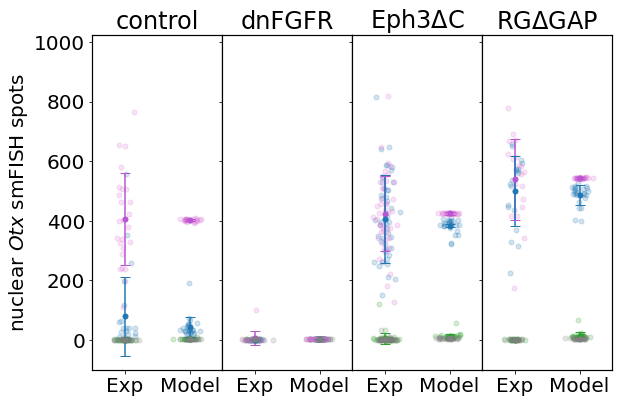

In [25]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# Control
plot_comp(inj_PHGFP_a65, inj_PHGFP_a66, inj_PHGFP_a67, inj_PHGFP_a68, Otx_pred_65_sc, Otx_pred_66_sc, Otx_pred_67_sc, Otx_pred_68_sc,n=0, a=0.2)
ax = axs[0]
myErrorbar(x=[1], mean_a65= mean_inj_PHGFP_a65, mean_a66= mean_inj_PHGFP_a66, mean_a67=mean_inj_PHGFP_a67, mean_a68= mean_inj_PHGFP_a68, std_a65= std_inj_PHGFP_a65, std_a66= std_inj_PHGFP_a66, std_a67=std_inj_PHGFP_a67, std_a68=std_inj_PHGFP_a68, axs =ax)
myErrorbar(x=[2], mean_a65= a65_Otx_mean_pred_sc, mean_a66= a66_Otx_mean_pred_sc, mean_a67=a67_Otx_mean_pred_sc, mean_a68= a68_Otx_mean_pred_sc, std_a65= a65_Otx_std_pred_sc, std_a66= a66_Otx_std_pred_sc , std_a67=a67_Otx_std_pred_sc , std_a68=a68_Otx_std_pred_sc , axs =ax)
my_axsis(ax, xlim=[0.5,2.5], ylim=[-100,1024], xticks=[1,2], title='control', xtickslabels=['Exp', 'Model'])
ax.set_ylabel('nuclear $Otx$ smFISH spots')

# dnFGFR
plot_comp(inj_dnFGFR_a65, inj_dnFGFR_a66, inj_dnFGFR_a67, inj_dnFGFR_a68, Otx_pred_dnFGFR_65_sc, Otx_pred_dnFGFR_66_sc, Otx_pred_dnFGFR_67_sc, Otx_pred_dnFGFR_68_sc, n=1, a=0.2)
ax = axs[1]
myErrorbar(x=[1], mean_a65= mean_inj_dnFGFR_a65, mean_a66= mean_inj_dnFGFR_a66, mean_a67=mean_inj_dnFGFR_a67, mean_a68= mean_inj_dnFGFR_a68, std_a65= std_inj_dnFGFR_a65, std_a66= std_inj_dnFGFR_a66, std_a67=std_inj_dnFGFR_a67, std_a68=std_inj_dnFGFR_a68, axs =ax)
myErrorbar(x=[2], mean_a65= a65_Otx_mean_pred_dnFGFR_sc, mean_a66= a66_Otx_mean_pred_dnFGFR_sc, mean_a67=a67_Otx_mean_pred_dnFGFR_sc, mean_a68= a68_Otx_mean_pred_dnFGFR_sc, std_a65= a65_Otx_std_pred_dnFGFR_sc, std_a66= a66_Otx_std_pred_dnFGFR_sc, std_a67=a67_Otx_std_pred_dnFGFR_sc, std_a68=a68_Otx_std_pred_dnFGFR_sc, axs =ax)
my_axsis(ax, xlim=[0.5,2.5], ylim=[-100,1024], xticks=[1,2], title='dnFGFR', xtickslabels=['Exp', 'Model'])

# dnEph
plot_comp(inj_dnEph_a65, inj_dnEph_a66, inj_dnEph_a67, inj_dnEph_a68, Otx_pred_dnEph_65_sc, Otx_pred_dnEph_66_sc, Otx_pred_dnEph_67_sc, Otx_pred_dnEph_68_sc, n=2, a=0.2)
ax = axs[2]
myErrorbar(x=[1], mean_a65= mean_inj_dnEph_a65, mean_a66= mean_inj_dnEph_a66, mean_a67=mean_inj_dnEph_a67, mean_a68= mean_inj_dnEph_a68, std_a65= std_inj_dnEph_a65, std_a66= std_inj_dnEph_a66, std_a67=std_inj_dnEph_a67, std_a68=std_inj_dnEph_a68, axs =ax)
myErrorbar(x=[2], mean_a65= a65_Otx_mean_pred_dnEph_sc, mean_a66= a66_Otx_mean_pred_dnEph_sc, mean_a67=a67_Otx_mean_pred_dnEph_sc, mean_a68= a68_Otx_mean_pred_dnEph_sc, std_a65= a65_Otx_std_pred_dnEph_sc, std_a66= a66_Otx_std_pred_dnEph_sc, std_a67=a67_Otx_std_pred_dnEph_sc, std_a68=a68_Otx_std_pred_dnEph_sc, axs =ax)
my_axsis(ax, xlim=[0.5,2.5], ylim=[-100,1024], xticks=[1,2], title='Eph3$\Delta$C', xtickslabels=['Exp', 'Model'])

# dnRG
plot_comp(inj_dnRG_a65, inj_dnRG_a66, inj_dnRG_a67, inj_dnRG_a68,Otx_pred_dnRG_65_sc, Otx_pred_dnRG_66_sc, Otx_pred_dnRG_67_sc, Otx_pred_dnRG_68_sc,n=3, a=0.2)
ax = axs[3]
myErrorbar(x=[1], mean_a65= mean_inj_dnRG_a65, mean_a66= mean_inj_dnRG_a66, mean_a67=mean_inj_dnRG_a67, mean_a68= mean_inj_dnRG_a68, std_a65= std_inj_dnRG_a65, std_a66= std_inj_dnRG_a66, std_a67=std_inj_dnRG_a67, std_a68=std_inj_dnRG_a68, axs =ax)
myErrorbar(x=[2], mean_a65= a65_Otx_mean_pred_dnRG_sc, mean_a66= a66_Otx_mean_pred_dnRG_sc, mean_a67=a67_Otx_mean_pred_dnRG_sc, mean_a68= a68_Otx_mean_pred_dnRG_sc, std_a65= a65_Otx_std_pred_dnRG_sc, std_a66=a66_Otx_std_pred_dnRG_sc, std_a67=a67_Otx_std_pred_dnRG_sc, std_a68=a68_Otx_std_pred_dnRG_sc, axs =ax)
my_axsis(ax, xlim=[0.5,2.5], ylim=[-100,1024], xticks=[1,2], title='RG$\Delta$GAP', xtickslabels=['Exp', 'Model'])

plt.tight_layout()
plt.show()



## Figure S4A

### dnFGFR

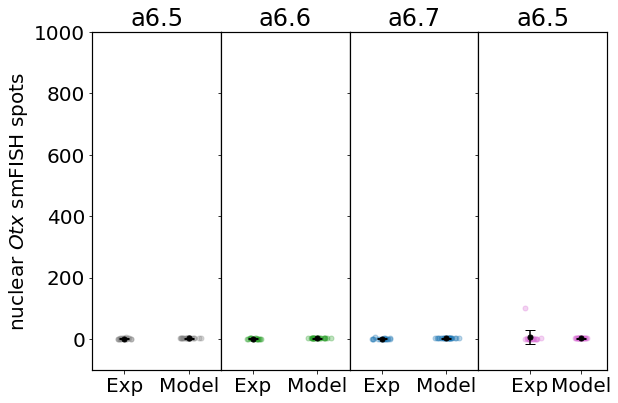

In [26]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# a6.8
x = np.random.normal(1, 0.08, size=len(inj_dnFGFR_a68))
axs[0].plot(x,inj_dnFGFR_a68,'.', color='grey', alpha=0.3, markersize=10,zorder=1)
 
axs[0].errorbar(1,mean_inj_dnFGFR_a68 ,std_inj_dnFGFR_a68, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnFGFR_68_sc))
axs[0].plot(x,Otx_pred_dnFGFR_68_sc,'.', color='grey', alpha=0.3, markersize=10,zorder=1)

axs[0].errorbar(2,a68_Otx_mean_pred_dnFGFR_sc ,a68_Otx_std_pred_dnFGFR_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[0], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True)
axs[0].set_ylabel('nuclear $Otx$ smFISH spots')


# a6.6 
x = np.random.normal(1, 0.08, size=len(inj_dnFGFR_a66))
axs[1].plot(x,inj_dnFGFR_a66,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[1].errorbar(x,mean_inj_dnFGFR_a66 ,std_inj_dnFGFR_a66, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnFGFR_66_sc))
axs[1].plot(x,Otx_pred_dnFGFR_66_sc,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[1].errorbar(x,a66_Otx_mean_pred_dnFGFR_sc ,a66_Otx_std_pred_dnFGFR_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[1], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.6', xtickslabels=['Exp', 'Model'], bold=True)


# a6.7 
x = np.random.normal(1, 0.08, size=len(inj_dnFGFR_a67))
axs[2].plot(x,inj_dnFGFR_a67,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)
 
axs[2].errorbar(1,mean_inj_dnFGFR_a67 ,std_inj_dnFGFR_a67, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnFGFR_67_sc))
axs[2].plot(x,Otx_pred_dnFGFR_67_sc,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)

axs[2].errorbar(2,a67_Otx_mean_pred_dnFGFR_sc,a67_Otx_std_pred_dnFGFR_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[2], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.7', xtickslabels=['Exp', 'Model'], bold=True)


# a6.5
x = np.random.normal(1, 0.08, size=len(inj_dnFGFR_a65))
axs[3].plot(x,inj_dnFGFR_a65,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)
 
axs[3].errorbar(1,mean_inj_dnFGFR_a65 ,std_inj_dnFGFR_a65, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnFGFR_65_sc))
axs[3].plot(x,Otx_pred_dnFGFR_65_sc,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)

axs[3].errorbar(2,a65_Otx_mean_pred_dnFGFR_sc, a65_Otx_std_pred_dnFGFR_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[3], xlim= [0,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True)

plt.tight_layout()
plt.show()

### Eph3DC

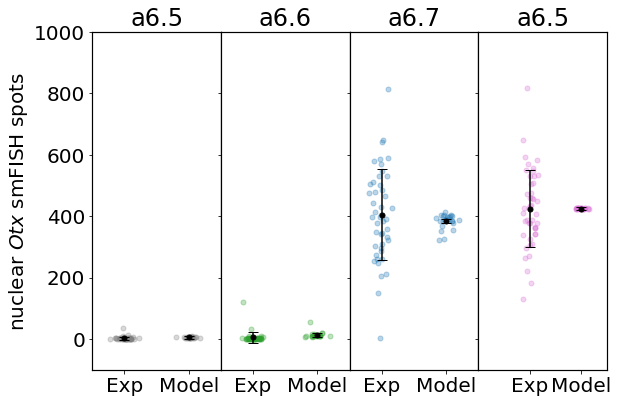

In [27]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# a6.8
x = np.random.normal(1, 0.08, size=len(inj_dnEph_a68))
axs[0].plot(x,inj_dnEph_a68,'.', color='grey', alpha=0.3, markersize=10,zorder=1)
 
axs[0].errorbar(1,mean_inj_dnEph_a68 ,std_inj_dnEph_a68, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnEph_68_sc))
axs[0].plot(x,Otx_pred_dnEph_68_sc,'.', color='grey', alpha=0.3, markersize=10,zorder=1)

axs[0].errorbar(2,a68_Otx_mean_pred_dnEph_sc ,a68_Otx_std_pred_dnEph_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[0], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True)
axs[0].set_ylabel('nuclear $Otx$ smFISH spots')


# a6.6 
x = np.random.normal(1, 0.08, size=len(inj_dnEph_a66))
axs[1].plot(x,inj_dnEph_a66,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[1].errorbar(x,mean_inj_dnEph_a66 ,std_inj_dnEph_a66, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnEph_66_sc))
axs[1].plot(x,Otx_pred_dnEph_66_sc,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[1].errorbar(x,a66_Otx_mean_pred_dnEph_sc ,a66_Otx_std_pred_dnEph_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[1], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.6', xtickslabels=['Exp', 'Model'], bold=True)


# a6.7 
x = np.random.normal(1, 0.08, size=len(inj_dnEph_a67))
axs[2].plot(x,inj_dnEph_a67,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)
 
axs[2].errorbar(1,mean_inj_dnEph_a67 ,std_inj_dnEph_a67, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnEph_67_sc))
axs[2].plot(x,Otx_pred_dnEph_67_sc,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)

axs[2].errorbar(2,a67_Otx_mean_pred_dnEph_sc,a67_Otx_std_pred_dnEph_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[2], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.7', xtickslabels=['Exp', 'Model'], bold=True)


# a6.5
x = np.random.normal(1, 0.08, size=len(inj_dnEph_a65))
axs[3].plot(x,inj_dnEph_a65,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)
 
axs[3].errorbar(1,mean_inj_dnEph_a65 ,std_inj_dnEph_a65, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnEph_65_sc))
axs[3].plot(x,Otx_pred_dnEph_65_sc,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)

axs[3].errorbar(2,a65_Otx_mean_pred_dnEph_sc, a65_Otx_std_pred_dnEph_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[3], xlim= [0,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True)

plt.tight_layout()
plt.show()

### RGDGAP

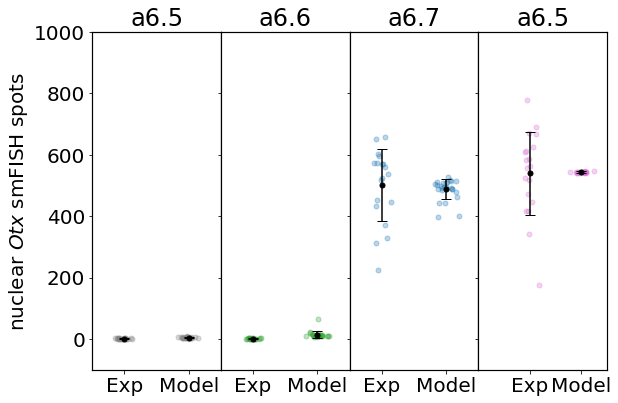

In [28]:
fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# a6.8
x = np.random.normal(1, 0.08, size=len(inj_dnRG_a68))
axs[0].plot(x,inj_dnRG_a68,'.', color='grey', alpha=0.3, markersize=10,zorder=1)
 
axs[0].errorbar(1,mean_inj_dnRG_a68 ,std_inj_dnRG_a68, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnRG_68_sc))
axs[0].plot(x,Otx_pred_dnRG_68_sc,'.', color='grey', alpha=0.3, markersize=10,zorder=1)

axs[0].errorbar(2,a68_Otx_mean_pred_dnRG_sc ,a68_Otx_std_pred_dnRG_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[0], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True)
axs[0].set_ylabel('nuclear $Otx$ smFISH spots')


# a6.6 
x = np.random.normal(1, 0.08, size=len(inj_dnRG_a66))
axs[1].plot(x,inj_dnRG_a66,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[1].errorbar(x,mean_inj_dnRG_a66 ,std_inj_dnRG_a66, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnRG_66_sc))
axs[1].plot(x,Otx_pred_dnRG_66_sc,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[1].errorbar(x,a66_Otx_mean_pred_dnRG_sc ,a66_Otx_std_pred_dnRG_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[1], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.6', xtickslabels=['Exp', 'Model'], bold=True)


# a6.7 
x = np.random.normal(1, 0.08, size=len(inj_dnRG_a67))
axs[2].plot(x,inj_dnRG_a67,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)
 
axs[2].errorbar(1,mean_inj_dnRG_a67 ,std_inj_dnRG_a67, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnRG_67_sc))
axs[2].plot(x,Otx_pred_dnRG_67_sc,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)

axs[2].errorbar(2,a67_Otx_mean_pred_dnRG_sc,a67_Otx_std_pred_dnRG_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[2], xlim= [0.5,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.7', xtickslabels=['Exp', 'Model'], bold=True)


# a6.5
x = np.random.normal(1, 0.08, size=len(inj_dnRG_a65))
axs[3].plot(x,inj_dnRG_a65,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)
 
axs[3].errorbar(1,mean_inj_dnRG_a65 ,std_inj_dnRG_a65, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Otx_pred_dnRG_65_sc))
axs[3].plot(x,Otx_pred_dnRG_65_sc,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)

axs[3].errorbar(2,a65_Otx_mean_pred_dnRG_sc, a65_Otx_std_pred_dnRG_sc, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[3], xlim= [0,2.5], ylim=[-100,1000], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True)

plt.tight_layout()
plt.show()